# importing imp modules

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',5000)
pd.set_option('display.max_rows',5000)

# importing data

In [3]:
data_train = pd.read_csv('titanic_train.csv',skipinitialspace=True)
data_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
data_train.Name.value_counts()

Larsson, Mr. August Viktor                                                            1
Kiernan, Mr. Philip                                                                   1
Newell, Mr. Arthur Webster                                                            1
Becker, Miss. Marion Louise                                                           1
Morley, Mr. William                                                                   1
Ali, Mr. William                                                                      1
Gee, Mr. Arthur H                                                                     1
Minahan, Dr. William Edward                                                           1
Jonsson, Mr. Carl                                                                     1
Goldsmith, Master. Frank John William "Frankie"                                       1
Nasser, Mrs. Nicholas (Adele Achem)                                                   1
Potter, Mrs. Thomas Jr (Lily Ale

In [5]:
data_test = pd.read_csv('titanic_test.csv',skipinitialspace=True)
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
data_test.insert(1,column='Survived',value=np.nan)
data_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
data_test.shape

(418, 12)

In [9]:
combined = pd.concat([data_train,data_test],sort=False)
combined.reset_index(drop=True,inplace=True)
combined.shape

(1309, 12)

# data analysis

In [10]:
combined.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [11]:
combined.Age.value_counts()

24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
25.00    34
28.00    32
36.00    31
26.00    30
29.00    30
27.00    30
19.00    29
23.00    26
32.00    24
20.00    23
35.00    23
31.00    23
45.00    21
33.00    21
17.00    20
39.00    20
16.00    19
42.00    18
40.00    18
34.00    16
50.00    15
47.00    14
48.00    14
38.00    14
2.00     12
41.00    11
9.00     10
1.00     10
54.00    10
4.00     10
44.00    10
43.00     9
37.00     9
49.00     9
14.00     8
55.00     8
51.00     8
60.00     7
3.00      7
6.00      6
8.00      6
46.00     6
15.00     6
52.00     6
58.00     6
13.00     5
64.00     5
62.00     5
5.00      5
57.00     5
61.00     5
32.50     4
7.00      4
11.00     4
53.00     4
56.00     4
63.00     4
10.00     4
0.75      3
65.00     3
18.50     3
40.50     3
59.00     3
28.50     3
12.00     3
0.83      3
34.50     2
71.00     2
45.50     2
70.00     2
14.50     2
30.50     2
0.92      2
36.50     2
23.50     1
67.00     1
60.50     1
38.50     1
0.17

In [12]:
sp.stats.skew(combined.Pclass)

-0.5979608943517511

In [13]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [14]:
combined.iloc[:,11].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

Text(0.5, 1.0, 'Female')

<Figure size 432x288 with 0 Axes>

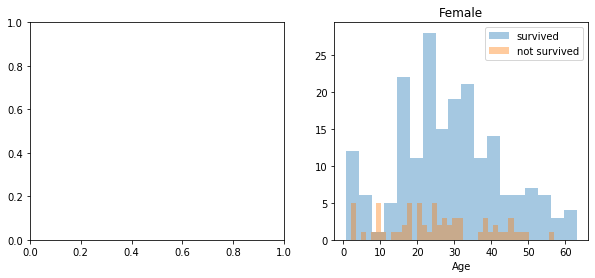

In [15]:
survived = 'survived'
not_survived = 'not survived'
fig = plt.figure()
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = combined[combined['Sex']=='female']
men = combined[combined['Sex']=='male']
ax[0] = sb.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, kde =False);
ax[0] = sb.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, kde =False);
ax[0].legend()
ax[0].set_title('Female')


Text(0.5, 1.0, 'Male')

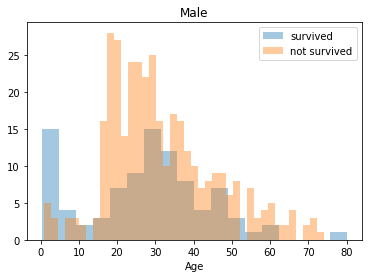

In [16]:
ax[1] = sb.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, kde = False);
ax[1] = sb.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, kde = False);
ax[1].legend()
ax[1].set_title('Male')

# dealing with null values

In [17]:
combined.Age = combined.Age.fillna(combined.Age.mean())

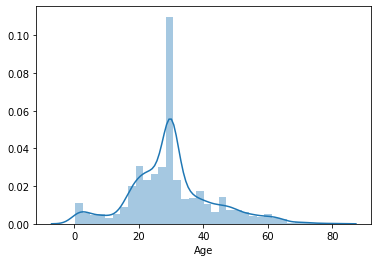

In [18]:
sb.distplot(combined.Age)

In [19]:
combined.Embarked = combined.Embarked.fillna(combined.Embarked.mode()[0])

In [20]:
combined.Fare = combined.Fare.fillna(value=np.mean(combined.Fare[combined.Pclass==3]))

In [21]:
np.mean(combined.Fare[combined.Pclass==3])

13.302888700564967

In [22]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [23]:
# U0-Undefined 0
combined.Cabin = combined.Cabin.fillna('U0')

In [24]:
combined.Cabin.sort_values()

583                 A10
1099                A11
475                 A14
556                 A16
1222                A18
284                 A19
599                 A20
919                 A21
630                 A23
867                 A24
647                 A26
1003                A29
209                 A31
185                 A32
445                 A34
1265                A34
1184                A34
806                 A36
96                   A5
23                   A6
174                  A7
937                  A9
1057                B10
737                B101
815                B102
1106                B11
329                 B18
523                 B18
170                 B19
690                 B20
781                 B20
540                 B22
745                 B22
1281                B24
1196                B26
829                 B28
61                  B28
779                  B3
54                  B30
641                 B35
369                 B35
917             

# Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [26]:
combined.Sex = enc.fit_transform(combined.Sex)
sex_class = pd.DataFrame(enc.classes_)
sex_class

,0
0,female
1,male


In [27]:
combined.Embarked = enc.fit_transform(combined.Embarked)
Embarked_class = pd.DataFrame(enc.classes_)
Embarked_class

,0
0,C
1,Q
2,S


# feature creation

In [28]:
combined['Cabin_deck'] = combined.Cabin.str.get(0)

In [29]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_deck
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U0,2,U
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,C
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U0,2,U
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,C
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U0,2,U


In [30]:
combined.Cabin_deck = enc.fit_transform(combined.Cabin_deck)
Cabin_deck_class = pd.DataFrame(enc.classes_)
Cabin_deck_class

,0
0,A
1,B
2,C
3,D
4,E
5,F
6,G
7,T
8,U


In [31]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_deck
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U0,2,8
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,2
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U0,2,8
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,2
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U0,2,8


In [32]:
combined['Title'] = combined.Name.str.extract(' ([A-Za-z]+)\.',expand=False)

In [33]:
combined.Title.isnull().sum()

0

In [34]:
combined.Title = combined.Title.replace(['Ms','Mlle'],'Miss')
combined.Title = combined.Title.replace('Mme','Mrs')
combined.Title = combined.Title.replace(['Rev','Dr','Col','Major','Countess',\
                                         'Don','Sir','Dona','Lady','Capt','Jonkheer'],'Others')

In [35]:
combined.Title = enc.fit_transform(combined.Title)
Title_class = pd.DataFrame(enc.classes_)
Title_class

,0
0,Master
1,Miss
2,Mr
3,Mrs
4,Others


In [36]:
combined['Relatives'] = (combined.SibSp+combined.Parch)

In [37]:
combined.Relatives.value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: Relatives, dtype: int64

In [38]:
combined.Fare.sort_values()

466       0.000000
481       0.000000
597       0.000000
413       0.000000
633       0.000000
674       0.000000
1157      0.000000
277       0.000000
271       0.000000
302       0.000000
732       0.000000
822       0.000000
806       0.000000
815       0.000000
1263      0.000000
179       0.000000
263       0.000000
912       3.170800
378       4.012500
872       5.000000
326       6.237500
1007      6.437500
843       6.437500
1024      6.437500
818       6.450000
202       6.495800
1123      6.495800
371       6.495800
654       6.750000
143       6.750000
411       6.858300
825       6.950000
1182      6.950000
129       6.975000
804       6.975000
1054      7.000000
892       7.000000
477       7.045800
363       7.050000
131       7.050000
210       7.050000
1216      7.050000
784       7.050000
884       7.050000
1102      7.050000
611       7.050000
465       7.050000
631       7.054200
721       7.054200
243       7.125000
433       7.125000
590       7.125000
761       7.

In [39]:
combined.Fare = combined.Fare.fillna(value=0)

In [40]:
combined['Fare_per_person'] = (combined.Fare/(combined.Relatives+1))

In [41]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_deck,Title,Relatives,Fare_per_person
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U0,2,8,2,1,3.62500
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,2,3,1,35.64165
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U0,2,8,1,0,7.92500
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,2,3,1,26.55000
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U0,2,8,2,0,8.05000


In [42]:
combined.Ticket.value_counts()

CA. 2343              11
1601                   8
CA 2144                8
3101295                7
PC 17608               7
S.O.C. 14879           7
347077                 7
347082                 7
382652                 6
347088                 6
113781                 6
19950                  6
PC 17757               5
W./C. 6608             5
349909                 5
113503                 5
4133                   5
16966                  5
220845                 5
24160                  4
LINE                   4
113760                 4
36928                  4
PC 17755               4
PC 17760               4
C.A. 33112             4
SC/Paris 2123          4
C.A. 34651             4
2666                   4
C.A. 2315              4
W./C. 6607             4
PC 17483               4
12749                  4
17421                  4
230136                 4
347742                 3
29103                  3
248727                 3
29106                  3
PC 17582               3


In [43]:
combined.corr().Survived.sort_values(ascending=False)

Survived           1.000000
Fare               0.257307
Fare_per_person    0.221600
Parch              0.081629
Relatives          0.016639
PassengerId       -0.005007
SibSp             -0.035322
Age               -0.070323
Title             -0.071174
Embarked          -0.167675
Cabin_deck        -0.301116
Pclass            -0.338481
Sex               -0.543351
Name: Survived, dtype: float64

In [44]:
combined.Survived[np.logical_and(combined['Pclass']==3,combined['Sex']==0)].value_counts()

0.0    72
1.0    72
Name: Survived, dtype: int64

In [45]:
print('male,1st,s ',45/(45+77))
print('male,2nd,s ',17/(17+91))
print('male,3rd,s ',47/(47+300))
print('female,1st,s ',91/(91+3))
print('female,2nd,s ',70/(70+6))
print('female,3rd,s ',72/(72+72))

male,1st,s  0.36885245901639346
male,2nd,s  0.1574074074074074
male,3rd,s  0.13544668587896252
female,1st,s  0.9680851063829787
female,2nd,s  0.9210526315789473
female,3rd,s  0.5


In [46]:
# Pclass_wise_survival
# 1= class-1,female
# 2= class-2,female
# 3= class-3,female
# 4= class-1,male
# 5= class-2,male
# 6= class-3,male
combined.loc[(np.logical_and(combined['Pclass']==1,combined['Sex']==0)),'Pclass_wise_survival']=6
combined.loc[(np.logical_and(combined['Pclass']==2,combined['Sex']==0)),'Pclass_wise_survival']=5
combined.loc[(np.logical_and(combined['Pclass']==3,combined['Sex']==0)),'Pclass_wise_survival']=4
combined.loc[(np.logical_and(combined['Pclass']==1,combined['Sex']==1)),'Pclass_wise_survival']=3
combined.loc[(np.logical_and(combined['Pclass']==2,combined['Sex']==1)),'Pclass_wise_survival']=2
combined.loc[(np.logical_and(combined['Pclass']==3,combined['Sex']==1)),'Pclass_wise_survival']=1

In [47]:
combined.Survived[np.logical_and(combined['Age']<1,combined['Sex']==0)].value_counts()

1.0    2
Name: Survived, dtype: int64

In [48]:
print('age<1 (m)-',5/5) 
print('1<=age<10 (m)-',(14)/(14+13))
print('10<=age<20 (m)-',(7)/(7+50))
print('20<=age<30 (m)-',(41)/(41+231)) 
print('30<=age<40 (m)-',(23)/(23+84))
print('40<=age<50 (m)-',(12)/(12+45)) 
print('50<=age<60 (m)-',(4)/(4+26))
print('age>=60 (m)-',(3)/(3+19)) 

print('age<1 (f)-',2/2) 
print('1<=age<10 (f)-',(17)/(17+11))
print('10<=age<20 (f)-',(34)/(34+11))
print('20<=age<30 (f)-',(88)/(88+37)) 
print('30<=age<40 (f)-',(50)/(50+10))
print('40<=age<50 (f)-',(22)/(22+10)) 
print('50<=age<60 (f)-',(16)/(16+2))
print('age>=60 (f)-',(4)/(4))

print('age<1 -',7/7) 
print('1<=age<10 -',(14+17)/(14+17+13+11))
print('10<=age<20 -',(7+34)/(7+34+50+11))
print('20<=age<30 -',(41+88)/(41+88+231+37)) 
print('30<=age<40 -',(23+50)/(23+50+84+10))
print('40<=age<50 -',(12+22)/(12+22+45+10)) 
print('50<=age<60 -',(4+16)/(4+16+26+2))
print('age>=60 -',(3+4)/(3+4+19+0))

age<1 (m)- 1.0
1<=age<10 (m)- 0.5185185185185185
10<=age<20 (m)- 0.12280701754385964
20<=age<30 (m)- 0.15073529411764705
30<=age<40 (m)- 0.21495327102803738
40<=age<50 (m)- 0.21052631578947367
50<=age<60 (m)- 0.13333333333333333
age>=60 (m)- 0.13636363636363635
age<1 (f)- 1.0
1<=age<10 (f)- 0.6071428571428571
10<=age<20 (f)- 0.7555555555555555
20<=age<30 (f)- 0.704
30<=age<40 (f)- 0.8333333333333334
40<=age<50 (f)- 0.6875
50<=age<60 (f)- 0.8888888888888888
age>=60 (f)- 1.0
age<1 - 1.0
1<=age<10 - 0.5636363636363636
10<=age<20 - 0.4019607843137255
20<=age<30 - 0.3249370277078086
30<=age<40 - 0.437125748502994
40<=age<50 - 0.38202247191011235
50<=age<60 - 0.4166666666666667
age>=60 - 0.2692307692307692


In [49]:
combined.loc[(combined['Age']<0),'Age_group']= 1
combined.loc[(np.logical_and(combined['Age']>=0,combined['Age']<10)),'Age_group']= 2
combined.loc[(np.logical_and(combined['Age']>=10,combined['Age']<20)),'Age_group']= 5
combined.loc[(np.logical_and(combined['Age']>=20,combined['Age']<30)),'Age_group']= 7
combined.loc[(np.logical_and(combined['Age']>=30,combined['Age']<40)),'Age_group']= 3
combined.loc[(np.logical_and(combined['Age']>=40,combined['Age']<50)),'Age_group']= 6
combined.loc[(np.logical_and(combined['Age']>=50,combined['Age']<60)),'Age_group']= 4
combined.loc[(combined['Age']>=60),'Age_group']= 8


In [50]:
#age group survival
combined.loc[(np.logical_and(combined['Age']<1,combined['Sex']==0)),'Age_group_survival']= 14
combined.loc[(np.logical_and(np.logical_and(combined['Age']>=1,combined['Age']<10),combined['Sex']==0)),'Age_group_survival']= 8
combined.loc[(np.logical_and(np.logical_and(combined['Age']>=10,combined['Age']<20),combined['Sex']==0)),'Age_group_survival']= 11
combined.loc[(np.logical_and(np.logical_and(combined['Age']>=20,combined['Age']<30),combined['Sex']==0)),'Age_group_survival']= 10
combined.loc[(np.logical_and(np.logical_and(combined['Age']>=30,combined['Age']<40),combined['Sex']==0)),'Age_group_survival']= 12
combined.loc[(np.logical_and(np.logical_and(combined['Age']>=40,combined['Age']<50),combined['Sex']==0)),'Age_group_survival']= 9
combined.loc[(np.logical_and(np.logical_and(combined['Age']>=50,combined['Age']<60),combined['Sex']==0)),'Age_group_survival']= 13
combined.loc[(np.logical_and(combined['Age']>=60,combined['Sex']==0)),'Age_group_survival']= 14

combined.loc[(np.logical_and(combined['Age']<1,combined['Sex']==1)),'Age_group_survival']= 14
combined.loc[(np.logical_and(np.logical_and(combined['Age']>=1,combined['Age']<10),combined['Sex']==1)),'Age_group_survival']= 7
combined.loc[(np.logical_and(np.logical_and(combined['Age']>=10,combined['Age']<20),combined['Sex']==1)),'Age_group_survival']= 1
combined.loc[(np.logical_and(np.logical_and(combined['Age']>=20,combined['Age']<30),combined['Sex']==1)),'Age_group_survival']= 4
combined.loc[(np.logical_and(np.logical_and(combined['Age']>=30,combined['Age']<40),combined['Sex']==1)),'Age_group_survival']= 6
combined.loc[(np.logical_and(np.logical_and(combined['Age']>=40,combined['Age']<50),combined['Sex']==1)),'Age_group_survival']= 5
combined.loc[(np.logical_and(np.logical_and(combined['Age']>=50,combined['Age']<60),combined['Sex']==1)),'Age_group_survival']= 2
combined.loc[(np.logical_and(combined['Age']>=60,combined['Sex']==1)),'Age_group_survival']= 3

In [51]:
combined['Age_class'] = combined.Age * combined.Pclass

In [52]:
combined.loc[combined.Relatives==0,'Alone/Family']=0
combined.loc[combined.Relatives>0,'Alone/Family']=1

In [53]:
combined.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_deck,Title,Relatives,Fare_per_person,Pclass_wise_survival,Age_group,Age_group_survival,Age_class,Alone/Family
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,U0,2,8,2,1,3.625,1.0,7.0,4.0,66.0,1.0


In [54]:
combined[['Pclass','Sex','SibSp','Parch','Embarked','Cabin_deck','Title','Relatives',\
         'Pclass_wise_survival','Age_group','Age_group_survival','Alone/Family']] = \
combined[['Pclass','Sex','SibSp','Parch','Embarked','Cabin_deck','Title','Relatives',\
         'Pclass_wise_survival','Age_group','Age_group_survival','Alone/Family']].astype('int')

In [55]:
combined.corr().Survived

PassengerId            -0.005007
Survived                1.000000
Pclass                 -0.338481
Sex                    -0.543351
Age                    -0.070323
SibSp                  -0.035322
Parch                   0.081629
Fare                    0.257307
Embarked               -0.167675
Cabin_deck             -0.301116
Title                  -0.071174
Relatives               0.016639
Fare_per_person         0.221600
Pclass_wise_survival    0.606044
Age_group              -0.147932
Age_group_survival      0.559118
Age_class              -0.326489
Alone/Family            0.203367
Name: Survived, dtype: float64

# model Creation

In [56]:
train = combined[combined.Survived.notna()]
test = combined[combined.Survived.isna()]
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_deck,Title,Relatives,Fare_per_person,Pclass_wise_survival,Age_group,Age_group_survival,Age_class,Alone/Family
891,892,NaN,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,U0,1,8,2,0,7.829200,1,3,6,103.5,0
892,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,U0,2,8,3,1,3.500000,4,6,9,141.0,1
893,894,NaN,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,U0,1,8,2,0,9.687500,2,8,3,124.0,0
894,895,NaN,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,U0,2,8,2,0,8.662500,1,7,4,81.0,0
895,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,U0,2,8,3,2,4.095833,4,7,10,66.0,1


In [57]:
train['Survived'] = train['Survived'].astype('int')

C:\Users\Sourajeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
X_train = train.drop(['Survived','Name','Ticket','Cabin','PassengerId'],axis=1)
y_train = train.Survived
X_test = test.drop(['Survived','Name','Ticket','Cabin','PassengerId'],axis=1)              
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_deck,Title,Relatives,Fare_per_person,Pclass_wise_survival,Age_group,Age_group_survival,Age_class,Alone/Family
891,3,1,34.5,0,0,7.8292,1,8,2,0,7.829200,1,3,6,103.5,0
892,3,0,47.0,1,0,7.0000,2,8,3,1,3.500000,4,6,9,141.0,1
893,2,1,62.0,0,0,9.6875,1,8,2,0,9.687500,2,8,3,124.0,0
894,3,1,27.0,0,0,8.6625,2,8,2,0,8.662500,1,7,4,81.0,0
895,3,0,22.0,1,1,12.2875,2,8,3,2,4.095833,4,7,10,66.0,1


# Scaling

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_columns = X_train.columns
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test),columns=X_columns)

In [60]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
Pclass                  418 non-null float64
Sex                     418 non-null float64
Age                     418 non-null float64
SibSp                   418 non-null float64
Parch                   418 non-null float64
Fare                    418 non-null float64
Embarked                418 non-null float64
Cabin_deck              418 non-null float64
Title                   418 non-null float64
Relatives               418 non-null float64
Fare_per_person         418 non-null float64
Pclass_wise_survival    418 non-null float64
Age_group               418 non-null float64
Age_group_survival      418 non-null float64
Age_class               418 non-null float64
Alone/Family            418 non-null float64
dtypes: float64(16)
memory usage: 52.4 KB


In [61]:
data_sample_prediction = pd.read_csv('gender_submission.csv',skipinitialspace=True)
y_sample_prediction = data_sample_prediction.Survived

In [62]:
y_sample_prediction.value_counts()

0    266
1    152
Name: Survived, dtype: int64

## Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10050,max_depth=35,max_features=8,n_jobs=8,random_state=7)
rf_model.fit(X_train,y_train)
y_train_predict_rf = rf_model.predict(X_train)

In [64]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_train,y_train_predict_rf))
print(classification_report(y_train,y_train_predict_rf))

0.9876543209876543
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       549
           1       0.99      0.97      0.98       342

    accuracy                           0.99       891
   macro avg       0.99      0.99      0.99       891
weighted avg       0.99      0.99      0.99       891



In [65]:
y_test_predict_rf = rf_model.predict(X_test)
print(accuracy_score(y_sample_prediction,y_test_predict_rf))
print(classification_report(y_sample_prediction,y_test_predict_rf))

0.8325358851674641
              precision    recall  f1-score   support

           0       0.84      0.92      0.87       266
           1       0.83      0.68      0.75       152

    accuracy                           0.83       418
   macro avg       0.83      0.80      0.81       418
weighted avg       0.83      0.83      0.83       418



In [66]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(rf_model,X_train,y_train,cv=10,scoring='accuracy')
print(np.mean(cvs))
print(np.max(cvs))

0.8194007490636703
0.8876404494382022


## XGBoost

In [67]:
from xgboost import XGBClassifier
xg_model = XGBClassifier(max_depth=6,n_estimators=900,learning_rate=0.1,n_jobs=8,colsample_bytree=1,random_state=10)
xg_model.fit(X_train,y_train)
y_train_predict_xg = xg_model.predict(X_train)

In [68]:
print(accuracy_score(y_train,y_train_predict_xg))
print(classification_report(y_train,y_train_predict_xg))

0.9876543209876543
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       549
           1       0.99      0.98      0.98       342

    accuracy                           0.99       891
   macro avg       0.99      0.99      0.99       891
weighted avg       0.99      0.99      0.99       891



In [69]:
y_test_predict_xg = xg_model.predict(X_test)
print(accuracy_score(y_sample_prediction,y_test_predict_xg))
print(classification_report(y_sample_prediction,y_test_predict_xg))

0.7942583732057417
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       266
           1       0.76      0.63      0.69       152

    accuracy                           0.79       418
   macro avg       0.79      0.76      0.77       418
weighted avg       0.79      0.79      0.79       418



In [70]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(xg_model,X_train,y_train,cv=10,scoring='accuracy')
print(np.mean(cvs))
print(np.max(cvs))

0.817103620474407
0.898876404494382


## SVC

In [71]:
from sklearn.svm import SVC
svm_model = SVC(C=1000000,gamma=0.9)
svm_model.fit(X_train,y_train)
y_train_predict_svm = svm_model.predict(X_train)
y_test_predict_svm = svm_model.predict(X_test)
print(accuracy_score(y_train,y_train_predict_svm))
print(accuracy_score(y_sample_prediction,y_test_predict_svm))

0.9708193041526375
0.6794258373205742


## Voting Classifier

In [72]:
from sklearn.ensemble import VotingClassifier
vr_model = VotingClassifier([('rf',rf_model),('xgb',xg_model)])
vr_model.fit(X_train,y_train)
y_train_predict_vr = vr_model.predict(X_train)
y_test_predict_vr = vr_model.predict(X_test)
print(accuracy_score(y_train,y_train_predict_vr))
print(accuracy_score(y_sample_prediction,y_test_predict_vr))
vr_cvs = cross_val_score(vr_model,X_train,y_train,cv=10,scoring='accuracy')
print(np.mean(vr_cvs))
print(np.max(vr_cvs))

0.9876543209876543
0.8229665071770335
0.8261173533083644
0.9101123595505618


# Creating Submission csv file

In [ ]:
y_test_predict_sub = pd.DataFrame(data_test.PassengerId,columns=['PassengerId'])

In [ ]:
y_test_predict_sub.shape

In [ ]:
y_test_predict_sub['Survived'] = y_test_predict_vr

In [ ]:
y_test_predict_sub.Survived.value_counts()

In [ ]:
y_test_predict_sub.to_csv('Titanic_predictions5.csv',index=False)